In [35]:
!pip3 install pycaret

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
t_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
t_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [38]:
t_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
len(t_train)

8693

In [40]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [41]:
t_train= t_train.fillna(0)

In [42]:
t_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.234326,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.912090,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [43]:
from pycaret.classification import *
clf = setup(data=t_train, target='Transported',
            categorical_features = ['CryoSleep', 'VIP'],
            ignore_features = ['HomePlanet', 'Cabin', 'Destination', 'Name']
            )

,Description,Value
0,Session id,4337
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 14)"
4,Transformed data shape,"(8693, 10)"
5,Transformed train set shape,"(6085, 10)"
6,Transformed test set shape,"(2608, 10)"
7,Ignore features,4
8,Numeric features,6
9,Categorical features,2


In [44]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7942,0.8541,0.8476,0.7682,0.8058,0.5881,0.5916,0.3030
ada,Ada Boost Classifier,0.7832,0.8481,0.8144,0.7692,0.7910,0.5663,0.5674,0.2430
lightgbm,Light Gradient Boosting Machine,0.7824,0.8417,0.8375,0.7566,0.7950,0.5645,0.5678,0.3900
rf,Random Forest Classifier,0.7661,0.8296,0.7569,0.7741,0.7653,0.5323,0.5326,0.4080
et,Extra Trees Classifier,0.7591,0.8156,0.7302,0.7781,0.7532,0.5184,0.5196,0.2950
dt,Decision Tree Classifier,0.7002,0.7002,0.7008,0.7033,0.7019,0.4005,0.4007,0.0550
knn,K Neighbors Classifier,0.5839,0.6162,0.7298,0.5678,0.6386,0.1660,0.1734,0.0680
dummy,Dummy Classifier,0.5037,0.5000,1.0000,0.5037,0.6699,0.0000,0.0000,0.1140


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4337, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

1) Gradient Boosting
2) Ada Boost
3) Dummy

# Gradient Boosting

In [45]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7800,0.8592,0.8241,0.7598,0.7906,0.5596,0.5617
1,0.7767,0.8269,0.8599,0.7395,0.7952,0.5527,0.5604
2,0.7734,0.8252,0.8339,0.7464,0.7877,0.5463,0.5502
3,0.8292,0.8841,0.8599,0.8123,0.8354,0.6583,0.6594
4,0.8227,0.8733,0.8925,0.7851,0.8354,0.6449,0.6511
5,0.8026,0.8525,0.8627,0.7719,0.8148,0.6049,0.6092
6,0.8010,0.8647,0.8529,0.7745,0.8118,0.6017,0.6048
7,0.7895,0.8533,0.8399,0.7649,0.8006,0.5787,0.5815
8,0.7829,0.8574,0.8268,0.7620,0.7931,0.5655,0.5676


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

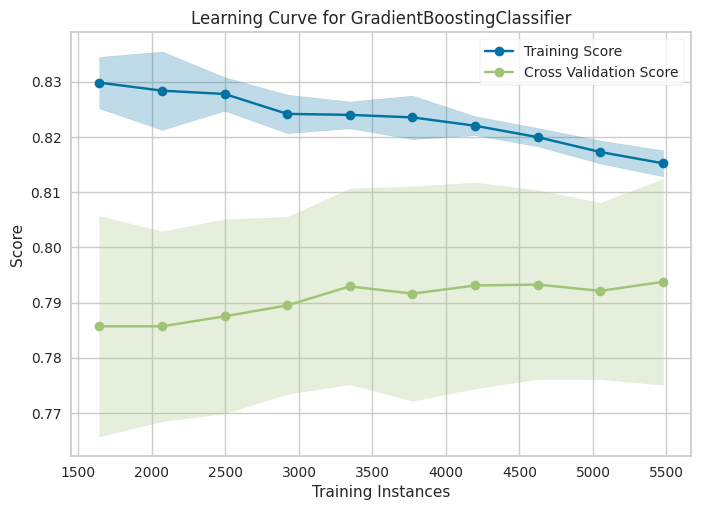

In [46]:
plot_model(estimator=gbc, plot='learning')

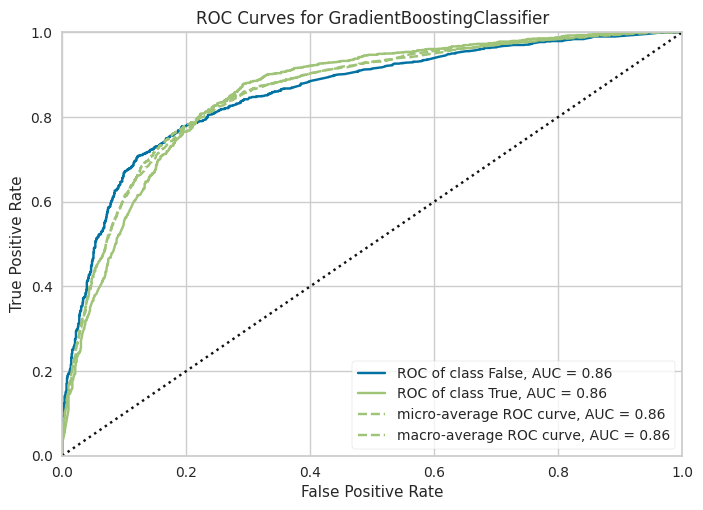

In [47]:
plot_model(estimator=gbc, plot='auc')

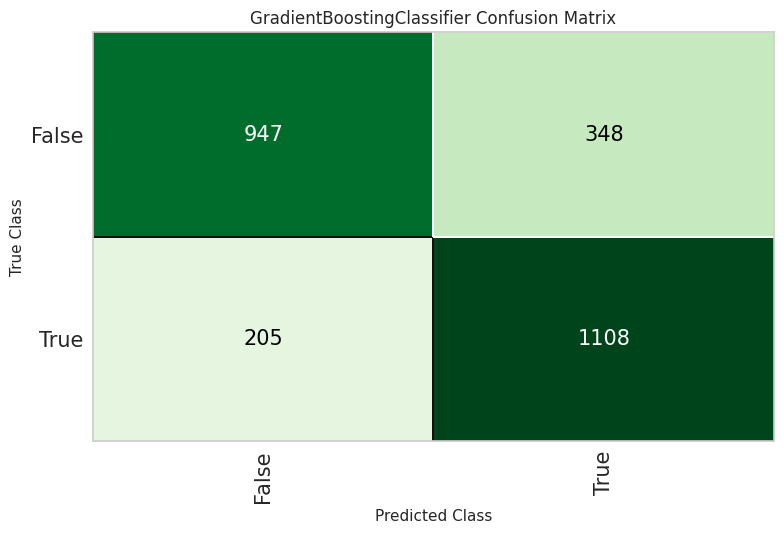

In [48]:
plot_model(estimator=gbc, plot='confusion_matrix')

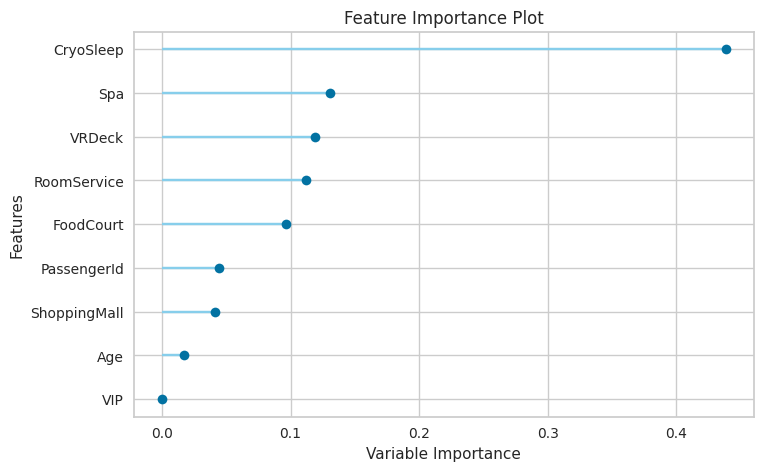

In [49]:
plot_model(estimator=gbc, plot='feature')

In [50]:
prediction = predict_model(gbc, data = t_test)
prediction.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,prediction_label,prediction_score
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,0.7097
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0.9637
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0.7097
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,0.9236
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0.7330


In [59]:
pred = prediction.iloc[:, [0,13]]
pred.head()

,PassengerId,prediction_label
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [63]:
pred['prediction_label'].replace([1, 0],['True', 'False'], inplace=True)

In [64]:
pred.head()

,PassengerId,prediction_label
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [62]:
pred.to_csv('/kaggle/working/titanic_spaceship_prediction.csv', index=False)

In [65]:
pred.to_csv('/kaggle/working/titanic_spaceship_submission.csv', index=False)